<a href="https://colab.research.google.com/github/aswx12/MatteLab/blob/Hoang/Mattelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW


In [2]:
github_url = 'https://github.com/aswx12/MatteLab/raw/refs/heads/main/Data_source.xlsx'

try:
    df = pd.read_excel(github_url)
    print("Loaded")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Loaded


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


EXERCISE 1.1

a)

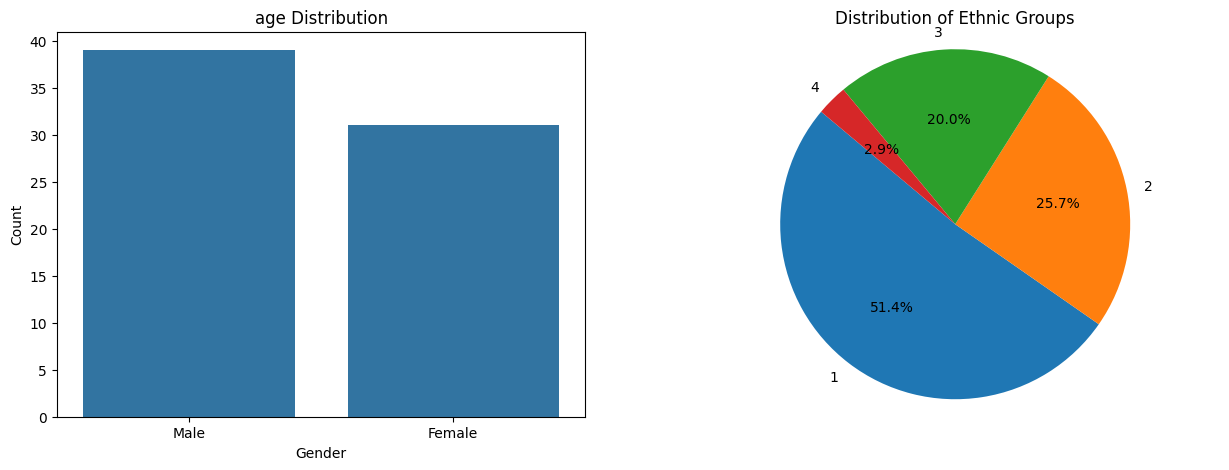

In [3]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a bar chart for gender
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0])
axes[0].set_title('age Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)


# Count the occurrences of each ethnic group
ethnic_counts = df['ethnicgp'].value_counts()
axes[1].pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Ethnic Groups')
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

b)

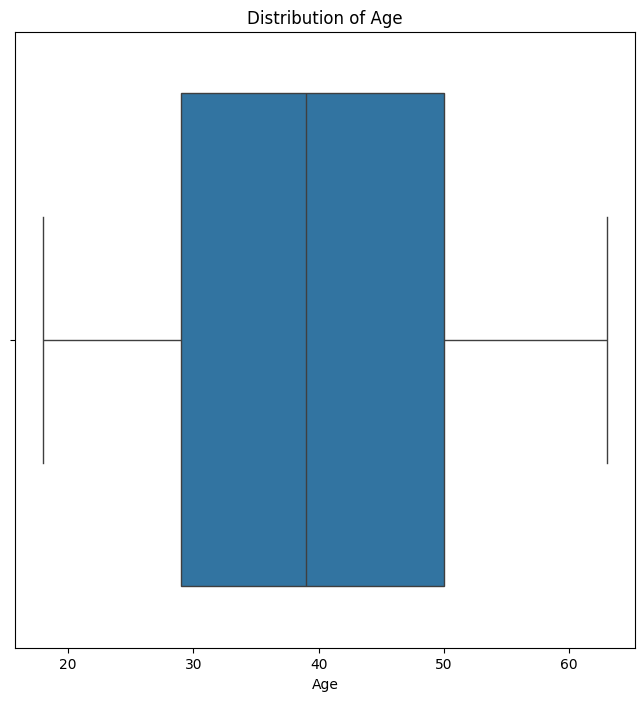

Max: 63.0
Min: 18.0
Median:  39.0
First quantile:  29.0
Third quantile:  50.0


In [4]:
max = df['age'].max()
min = df['age'].min()
median = df['age'].median()
firstQ = df['age'].quantile(.25)
thirdQ =  df['age'].quantile(.75)

plt.figure(figsize=(8, 8))
sns.boxplot(x=df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')

plt.show()

print('Max:', max)
print('Min:', min)
print('Median: ', median)
print('First quantile: ', firstQ)
print('Third quantile: ', thirdQ)

c)

,income
mean,15.638235
std,1.995894


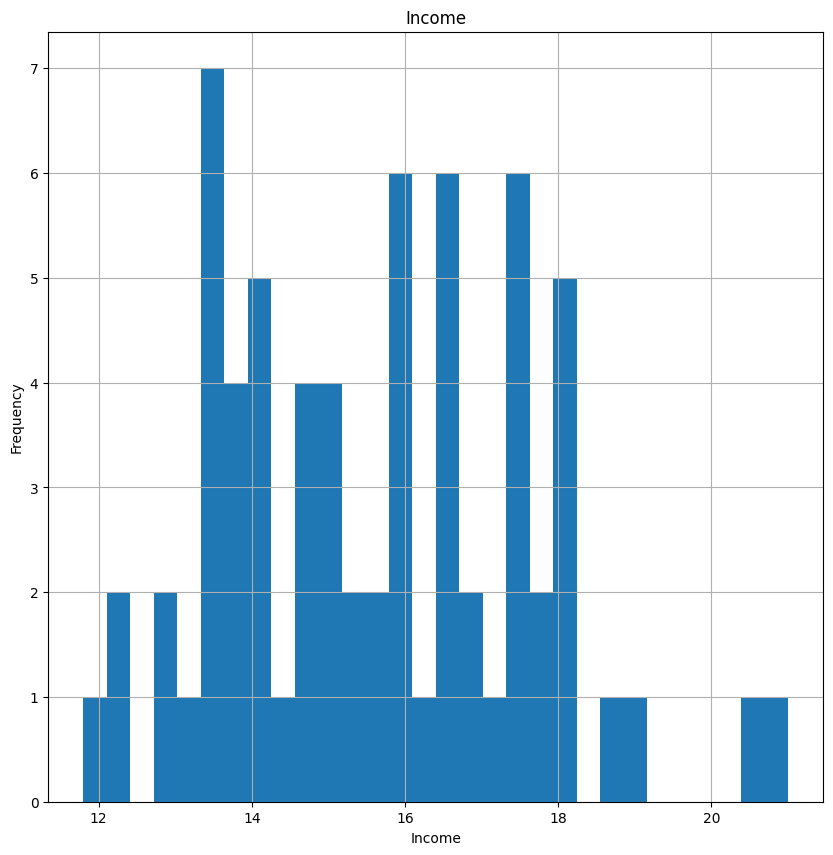

In [5]:
display(df['income'].agg(['mean','std']))

df['income'].hist(figsize=(10, 10),bins=30)
plt.title("Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Excersise 1.2

a)


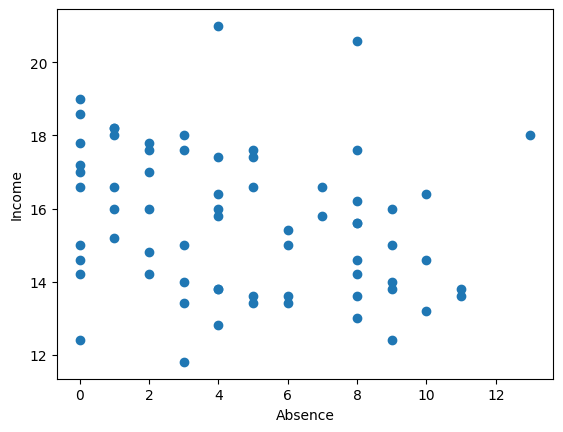

b) 

Intercept b0:  16.325322949730566
Slope b1: -0.14312024802539314
R2:  0.06243389452270087
Model:  16.325322949730566 + -0.14312024802539314 *absence


In [6]:
print("a)")
plt.scatter(df['absence'],df['income'])
plt.xlabel("Absence")
plt.ylabel("Income")
plt.show()


print("b) \n")
df_noNaN = df.dropna(subset=['income','absence'])
x=df_noNaN[['absence']]
y=df_noNaN['income']

reg = LinearRegression().fit(x, y)

b0=reg.intercept_
b1= reg.coef_[0]
r2 = reg.score(x, y)
print("Intercept b0: ",b0)
print("Slope b1:", b1)
print("R2: ", r2)
print("Model: ",b0,"+",b1,"*absence")



Exercise 1.3

a)

In [7]:
df_noNaN = df.dropna(subset=['satis','commit','autonom', 'income', 'skill', 'qual', 'age', 'years'])

x=df_noNaN[['commit', 'autonom', 'income', 'skill', 'qual', 'age', 'years']]
y=df_noNaN['satis']

x =sm.add_constant(x)
reg = sm.OLS(y, x).fit()

print("P-values:\n", reg.pvalues)
print("t-values:\n",reg.tvalues)
print("Model's regression estimators:\n", reg.params)


P-values:
 const      0.013147
commit     0.000051
autonom    0.000053
income     0.010946
skill      0.003559
qual       0.155518
age        0.735361
years      0.660962
dtype: float64
t-values:
 const     -2.564465
commit     4.401549
autonom    4.391415
income     2.635395
skill      3.048340
qual       1.440432
age        0.339752
years     -0.441017
dtype: float64
Model's regression estimators:
 const     -4.554520
commit     0.965394
autonom    0.395338
income     0.414140
skill      0.610467
qual       0.232872
age        0.012419
years     -0.014716
dtype: float64


 from the pvalues and t-values, age and years seem to not have very strong impact on satis. With t-values close to 0, age and years are likely to not have any significant influence on satis. At significance level of 0.05, age and years are clearly not significant, meaning it is safe to remove these two variables from the model. As for qual, even with p-value larger than 0.05, its t-value is not near 0, this means it still has some effect on the model, so it won't be removed from the model.

b)

In [8]:
x_reduced = x.drop(columns=['age','years'])
x_reduced_const = sm.add_constant(x_reduced)
reg_reduced = sm.OLS(y, x_reduced_const).fit()

print("P-values:\n", reg_reduced.pvalues)
print("t-values:\n",reg_reduced.tvalues)
print("Model's regression estimators:\n", reg_reduced.params)

P-values:
 const      0.005840
commit     0.000024
autonom    0.000019
income     0.000201
skill      0.002822
qual       0.148521
dtype: float64
t-values:
 const     -2.866330
commit     4.605824
autonom    4.671496
income     3.978249
skill      3.124278
qual       1.464971
dtype: float64
Model's regression estimators:
 const     -4.623191
commit     0.946158
autonom    0.403416
income     0.436321
skill      0.614724
qual       0.228315
dtype: float64


Exercise 1.4


In [9]:
a = df['satis']
a = a.dropna()

satisCI = st.t.interval(0.95, len(a)-1, a.mean(), scale=st.sem(a))
print(satisCI)

b = df.dropna(subset=['gender','satis'])
print(b.groupby('gender')['satis'].agg(['mean','std','count']))

group1 = b.loc[b['gender'] == 1, 'satis']
group2 = b.loc[b['gender'] == 2, 'satis']

result = st.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
ci = result.confidence_interval(confidence_level=0.95)
print(ci)

(np.float64(10.038594940808448), np.float64(11.637875647426846))
             mean       std  count
gender                            
1       10.945946  3.324538     37
2       10.709677  3.328599     31
ConfidenceInterval(low=np.float64(-1.381967818178503), high=np.float64(1.854504871360718))


Exercise 1.5

In [10]:
dfSkill = df[['gender','skill']]
dfskill = dfSkill.dropna()

skill_m = dfSkill.loc[dfSkill['gender'] == 1, 'skill']
skill_f = dfSkill.loc[dfSkill['gender'] == 2, 'skill']

stat, p = st.mannwhitneyu(skill_m, skill_f, alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

result = st.ttest_ind(skill_m, skill_f, equal_var=False)  # Welch’s t-test
ci = result.confidence_interval(confidence_level=0.95)
print(ci)


stat=733.000, p=0.117
Probably the same distribution
ConfidenceInterval(low=np.float64(-0.09642672496284532), high=np.float64(0.9252108440695447))


With p value of 0.117 and significance level of 0.05, you can only reject H0 if the calculated p-value is less than the chosen significance level, this means we keep H0, meaning there is not much difference between the skill levels of men and women. This statement is further reinforced when the CI level is calculated. The difference between lower bound and upper bound is not too large, showing the difference is minimal. Conclusion, there is little evidence that one gender tends to have higher or lower skill than the other.

Exercise 1.6

In [11]:
df_ethnic_absence = df[['ethnicgp','absence']]
df_ethnic_absence = df_ethnic_absence.dropna()
groups = [group['absence'].values for ethnic, group in df_ethnic_absence.groupby('ethnicgp')]
# group1 = df_ethnic_absence.loc[df_ethnic_absence['ethnicgp']==1, 'absence']
# group2 = df_ethnic_absence.loc[df_ethnic_absence['ethnicgp']==2, 'absence']
# group3 = df_ethnic_absence.loc[df_ethnic_absence['ethnicgp']==3, 'absence']
# group4 = df_ethnic_absence.loc[df_ethnic_absence['ethnicgp']==4, 'absence']

print("Kruskal")
stat, p = st.kruskal(*groups)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print("-------------------------")
print("ANOVA")
stat, p = st.f_oneway(*groups)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Kruskal
stat=3.411, p=0.332
Probably the same distribution
-------------------------
ANOVA
stat=1.150, p=0.336
Probably the same distribution


Exercise 1.7

In [12]:
noNan_income = df.dropna(subset=['income'])
noNan_income = noNan_income.copy()
#low = Min-Q1, middle = Q1-Q3, high= Q3-Max

max = df['income'].max()
min = df['income'].min()
firstQ = df['income'].quantile(.25)
thirdQ =  df['income'].quantile(.75)

bins = [min, firstQ, thirdQ, max]
labels = [1, 2, 3] #1 =low, 2 = middle, 3= high

income_class = pd.cut(noNan_income['income'], bins=bins, labels=labels)
noNan_income['income_class'] = income_class
display(noNan_income.head())

df_income_skill = noNan_income[['income_class','skill']]

groups = [group['skill'].values for ethnic, group in df_income_skill.groupby('income_class',observed=False)]

print("Kruskal")
stat, p = st.kruskal(*groups)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print("-------------------------")
print("ANOVA")
stat, p = st.f_oneway(*groups)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income,income_class
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6,2
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6,2
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8,3
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4,2
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6,3


Kruskal
stat=7.709, p=0.021
Probably different distributions
-------------------------
ANOVA
stat=4.055, p=0.022
Probably different distributions


Exercise 2.1

In [13]:
github_url = 'https://github.com/aswx12/MatteLab/raw/refs/heads/main/Diamonds%20Prices2022.csv'

try:
    df = pd.read_csv(github_url,index_col=0)
    print("Loaded")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Loaded


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Carat: Weight of the diamond (1 carat = 0.2 grams)
Cut: Quality of the diamond's cut (Fair, Good, Very Good, Premium, Ideal)
Color: Diamond color grade, ranging from D (colorless) to J(light yellow)
Clarity: Measure of internal flaws (inclusions) or external blemishes (e.g I1, SI2, VS1, etc.)
Depth: Total depth percentage of the diamond = (depth ÷ avg diameter) x 100
Table: Width of the diamond's top facet as a percentage of the avg diameter
Price: Price of the diamond in $
X: length in mm
Y: width in mm
Z: depth in mm

In [14]:
quantitative_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
df[quantitative_cols].describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000



--- CUT ---
           Frequency  Percentage
cut                             
Ideal          21551       39.95
Premium        13793       25.57
Very Good      12083       22.40
Good            4906        9.09
Fair            1610        2.98
Mode: Ideal

--- COLOR ---
       Frequency  Percentage
color                       
G          11292       20.93
E           9799       18.17
F           9543       17.69
H           8304       15.39
D           6775       12.56
I           5422       10.05
J           2808        5.21
Mode: G

--- CLARITY ---
         Frequency  Percentage
clarity                       
SI1          13067       24.22
VS2          12259       22.73
SI2           9194       17.04
VS1           8171       15.15
VVS2          5066        9.39
VVS1          3655        6.78
IF            1790        3.32
I1             741        1.37
Mode: SI1


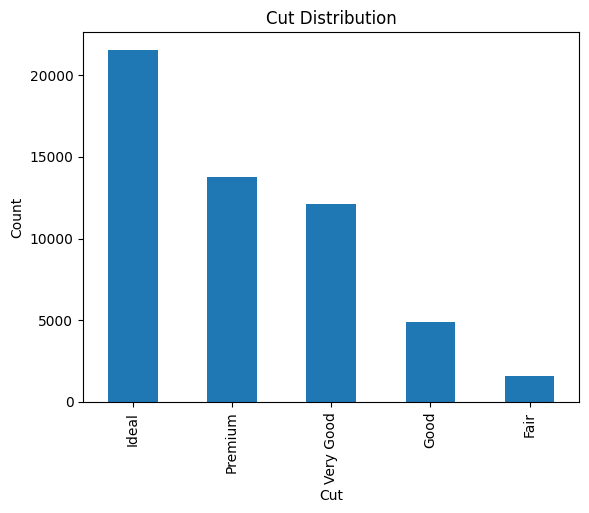

In [15]:
categorical_cols = ['cut', 'color', 'clarity']

# for col in categorical_cols:
#     print(f"\n{col.upper()} value counts:")
#     print(df[col].value_counts())
#     print(f"\n{col.upper()} mode: {df[col].mode()[0]}")

for col in ['cut', 'color', 'clarity']:
    print(f"\n--- {col.upper()} ---")
    freq = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    print(pd.DataFrame({'Frequency': freq, 'Percentage': percent.round(2)}))
    print(f"Mode: {df[col].mode()[0]}")

df['cut'].value_counts().plot(kind='bar', title='Cut Distribution')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

Exercise 2.2

In [16]:
#Depth - confidence interval 95%
depth = df['depth']
print(DescrStatsW(depth).tconfint_mean(0.05))

#Difference in price by Premium cut and good cut
premium = df[df["cut"] == "Premium"]["price"]
good = df[df["cut"] == "Good"]["price"]

result = st.ttest_ind(premium, good, equal_var=False)  # Welch’s t-test
ci = result.confidence_interval(confidence_level=0.95)
print(ci)

(np.float64(61.737232519333276), np.float64(61.76141234654371))
ConfidenceInterval(low=np.float64(529.0950336753338), high=np.float64(781.1612728301272))


Exercise 2.3

In [17]:
premium = df[df['cut'] == 'Premium']['price']
good = df[df['cut'] == 'Good']['price']


stat, p = st.ttest_ind(premium, good, equal_var=False)  # Welch’s t-test
#If p < 0.05, --> there is a significant difference between the two groups.
#If p ≥ 0.05, --> there’s no significant difference (the means are statistically similar).

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
	print('there is a significant difference between the two groups.')
else:
	print('there’s no significant difference (the means are statistically similar)')


stat=10.189, p=0.000
there is a significant difference between the two groups.


In [18]:
# @title
# anova_result = st.f_oneway(
#     df[df['cut'] == 'Fair']['price'],
#     df[df['cut'] == 'Good']['price'],
#     df[df['cut'] == 'Very Good']['price'],
#     df[df['cut'] == 'Premium']['price'],
#     df[df['cut'] == 'Ideal']['price']
# )

# print(f"F-statistic: {anova_result.statistic:.4f}")
# print(f"P-value: {anova_result.pvalue:.4f}")

# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['cut'], alpha=0.05)
# print(tukey)

Exercise 2.4

In [19]:
u_stat, p = st.mannwhitneyu(premium, good, alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
	print('significant difference in distribution between groups')
else:
	print('there’s no significant difference (the means are statistically similar)')

U-statistic: 36138521.5000
P-value: 0.0000
significant difference in distribution between groups


In [20]:
anova_result = st.f_oneway(
    df[df['cut'] == 'Fair']['price'],
    df[df['cut'] == 'Good']['price'],
    df[df['cut'] == 'Very Good']['price'],
    df[df['cut'] == 'Premium']['price'],
    df[df['cut'] == 'Ideal']['price']
)

print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if p < 0.05:
	print('at least one group differs significantly')
else:
	print('all groups have similar means')

F-statistic: 175.6326
P-value: 0.0000
at least one group differs significantly


Exercise 2.5

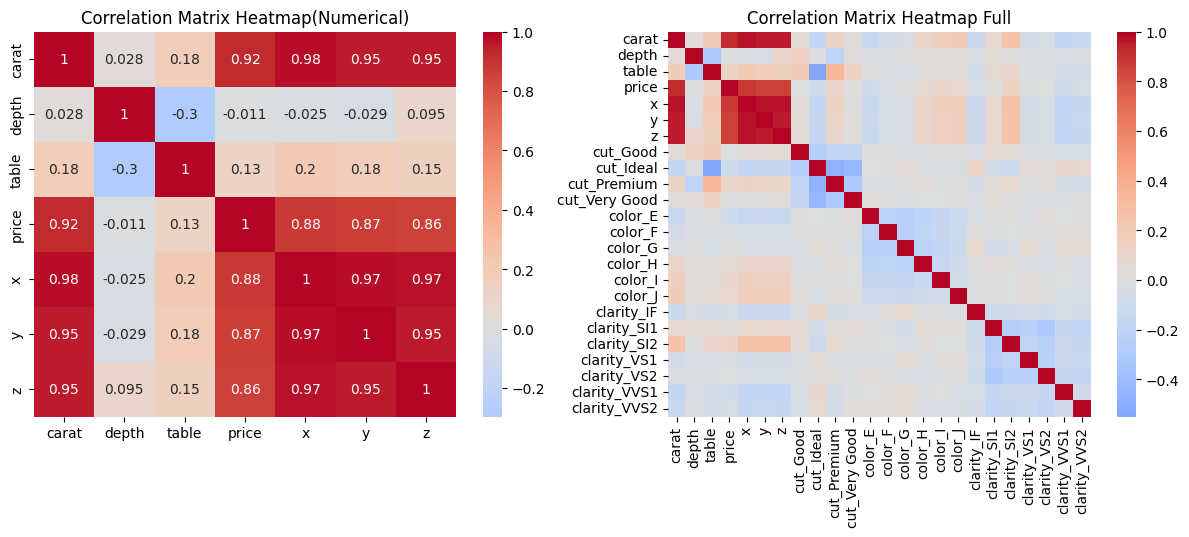

In [33]:


df_quan = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
# sns.heatmap(df_quan.corr(), annot=True, cmap='coolwarm', center=0)
# plt.title("Correlation Matrix Heatmap")
# plt.show()

df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

# Convert boolean columns to integers
for col in [col for col in df_encoded.columns if col.startswith(('cut_', 'color_', 'clarity_'))]:
    df_encoded[col] = df_encoded[col].astype(int)

# sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', center=0)
# plt.title("Correlation Matrix Heatmap Full")
# plt.show()

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df_quan.corr(), annot=True, cmap='coolwarm', center=0,ax=axes[0])
axes[0].set_title('Correlation Matrix Heatmap(Numerical)')

sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', center=0,ax=axes[1])
axes[1].set_title('Correlation Matrix Heatmap Full')
plt.show()

Exercise 2.6

In [ ]:
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

# Convert boolean columns to integers
for col in [col for col in df_encoded.columns if col.startswith(('cut_', 'color_', 'clarity_'))]:
    df_encoded[col] = df_encoded[col].astype(int)


# Define dependent and independent variables
X = df_encoded[['carat', 'depth', 'table', 'x', 'y', 'z'] +
               [col for col in df_encoded.columns if col.startswith(('cut_', 'color_', 'clarity_'))]]
y = df_encoded['price']

# Add constant term (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())